In [4]:
import pandas as pd
import numpy as np
from datetime import timedelta

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\sachin\visa\visa-status-prediction-1\datasets\Final_Cleaned_encoded.csv")

visa case status distribution

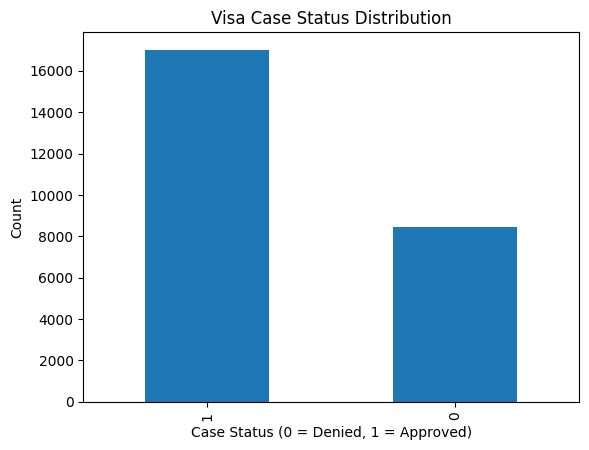

In [4]:
plt.figure()
df['case_status'].value_counts().plot(kind='bar')
plt.title("Visa Case Status Distribution")
plt.xlabel("Case Status (0 = Denied, 1 = Approved)")
plt.ylabel("Count")
plt.show()

Processing time distribution

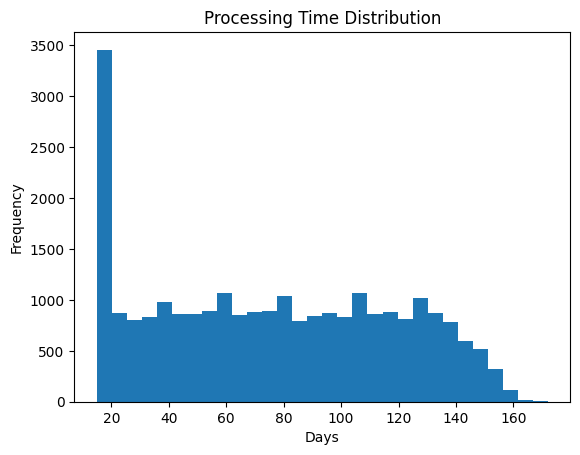

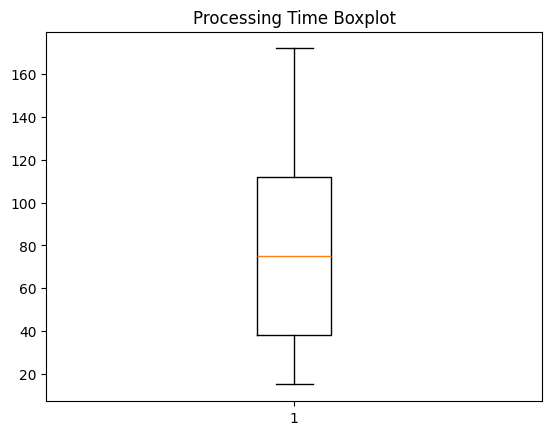

In [5]:
plt.figure()
plt.hist(df['processing_time_days'], bins=30)
plt.title("Processing Time Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.boxplot(df['processing_time_days'])
plt.title("Processing Time Boxplot")
plt.show()

Approval rate vs Job experience, requires training, full time position

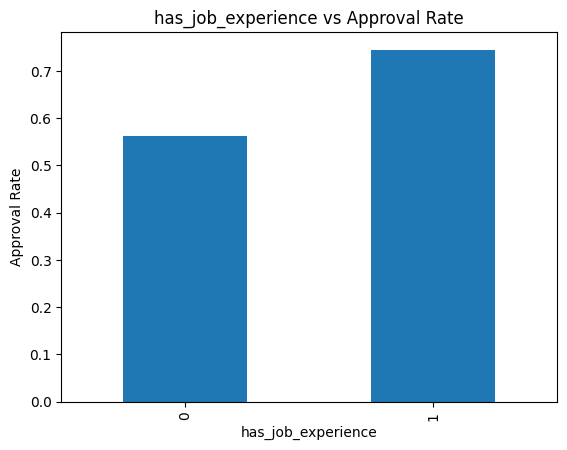

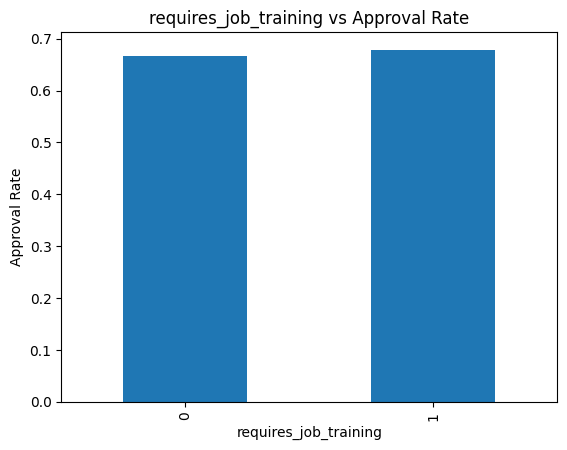

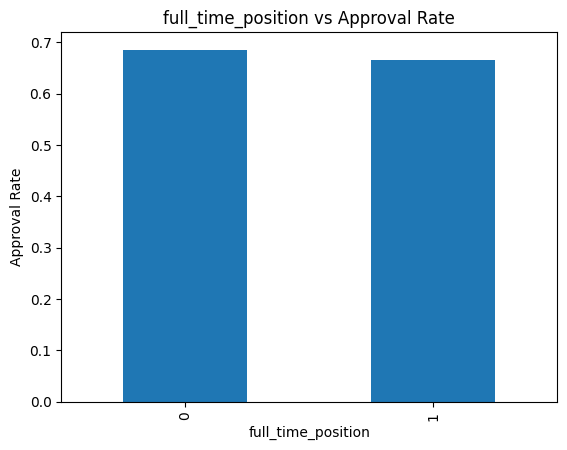

In [9]:
binary_features = [
    'has_job_experience',
    'requires_job_training',
    'full_time_position'
]

for col in binary_features:
    df.groupby(col)['case_status'].mean().plot(kind='bar')
    plt.title(f"{col} vs Approval Rate")
    plt.ylabel("Approval Rate")
    plt.show()

Avg processing time vs Job experience, requires training, full time position

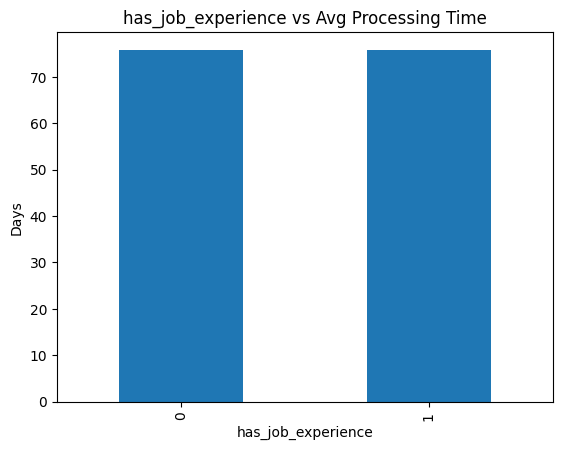

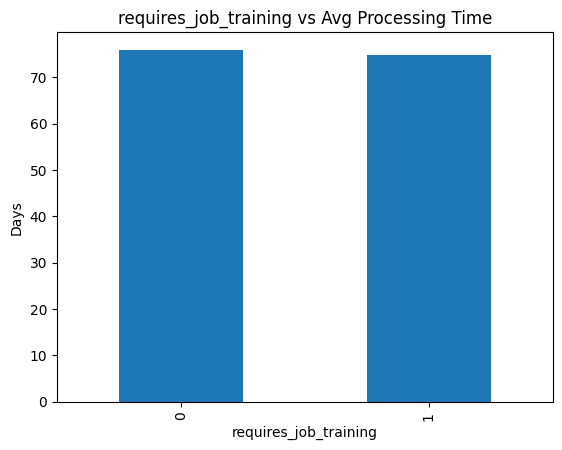

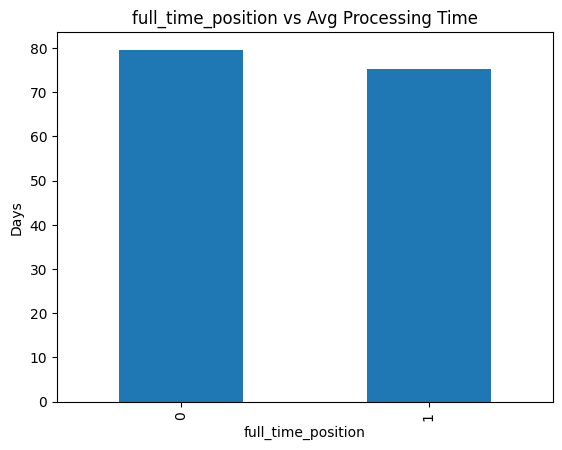

In [10]:
for col in binary_features:
    df.groupby(col)['processing_time_days'].mean().plot(kind='bar')
    plt.title(f"{col} vs Avg Processing Time")
    plt.ylabel("Days")
    plt.show()

Approval Rates and Processing Time by Continents

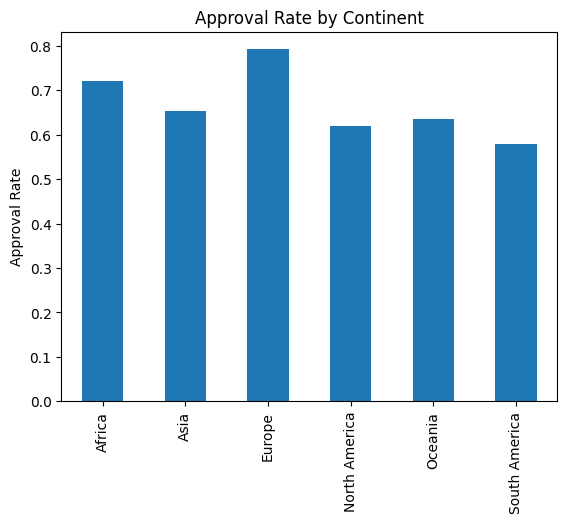

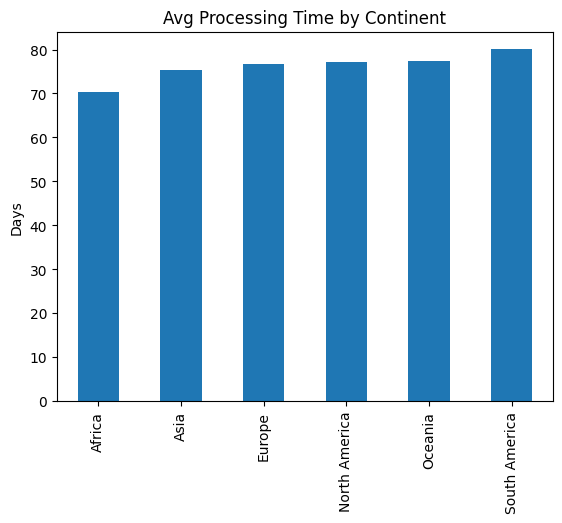

In [11]:
continent_cols = [c for c in df.columns if c.startswith('continent_')]

approval_rates = {}
processing_times = {}

for col in continent_cols:
    approval_rates[col.replace('continent_', '')] = (
        df.loc[df[col] == 1, 'case_status'].mean()
    )
    processing_times[col.replace('continent_', '')] = (
        df.loc[df[col] == 1, 'processing_time_days'].mean()
    )

pd.Series(approval_rates).plot(
    kind='bar',
    title="Approval Rate by Continent"
)
plt.ylabel("Approval Rate")
plt.show()

pd.Series(processing_times).plot(
    kind='bar',
    title="Avg Processing Time by Continent"
)
plt.ylabel("Days")
plt.show()

In [12]:
region_cols = [c for c in df.columns if c.startswith('region_of_employment_')]

region_approval = {
    c.replace('region_of_employment_', ''):
        df.loc[df[c] == 1, 'case_status'].mean()
    for c in region_cols
}


Approval rate by Region

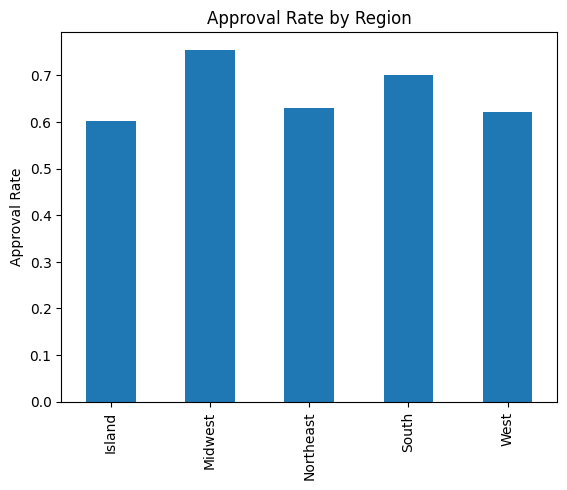

In [13]:
pd.Series(region_approval).plot(
    kind='bar',
    title="Approval Rate by Region"
)
plt.ylabel("Approval Rate")
plt.show()

Approval Rate by Education

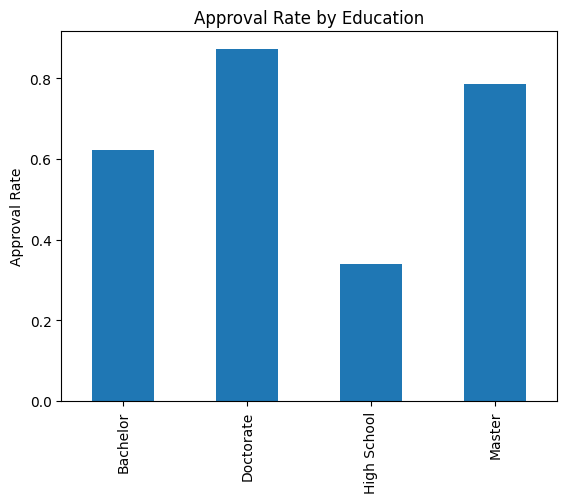

In [14]:
edu_cols = [c for c in df.columns if c.startswith('education_of_employee_')]

edu_approval = {
    c.replace('education_of_employee_', ''):
        df.loc[df[c] == 1, 'case_status'].mean()
    for c in edu_cols
}
pd.Series(edu_approval).plot(
    kind='bar',
    title="Approval Rate by Education"
)
plt.ylabel("Approval Rate")
plt.show()

Feature Correlation Heatmap

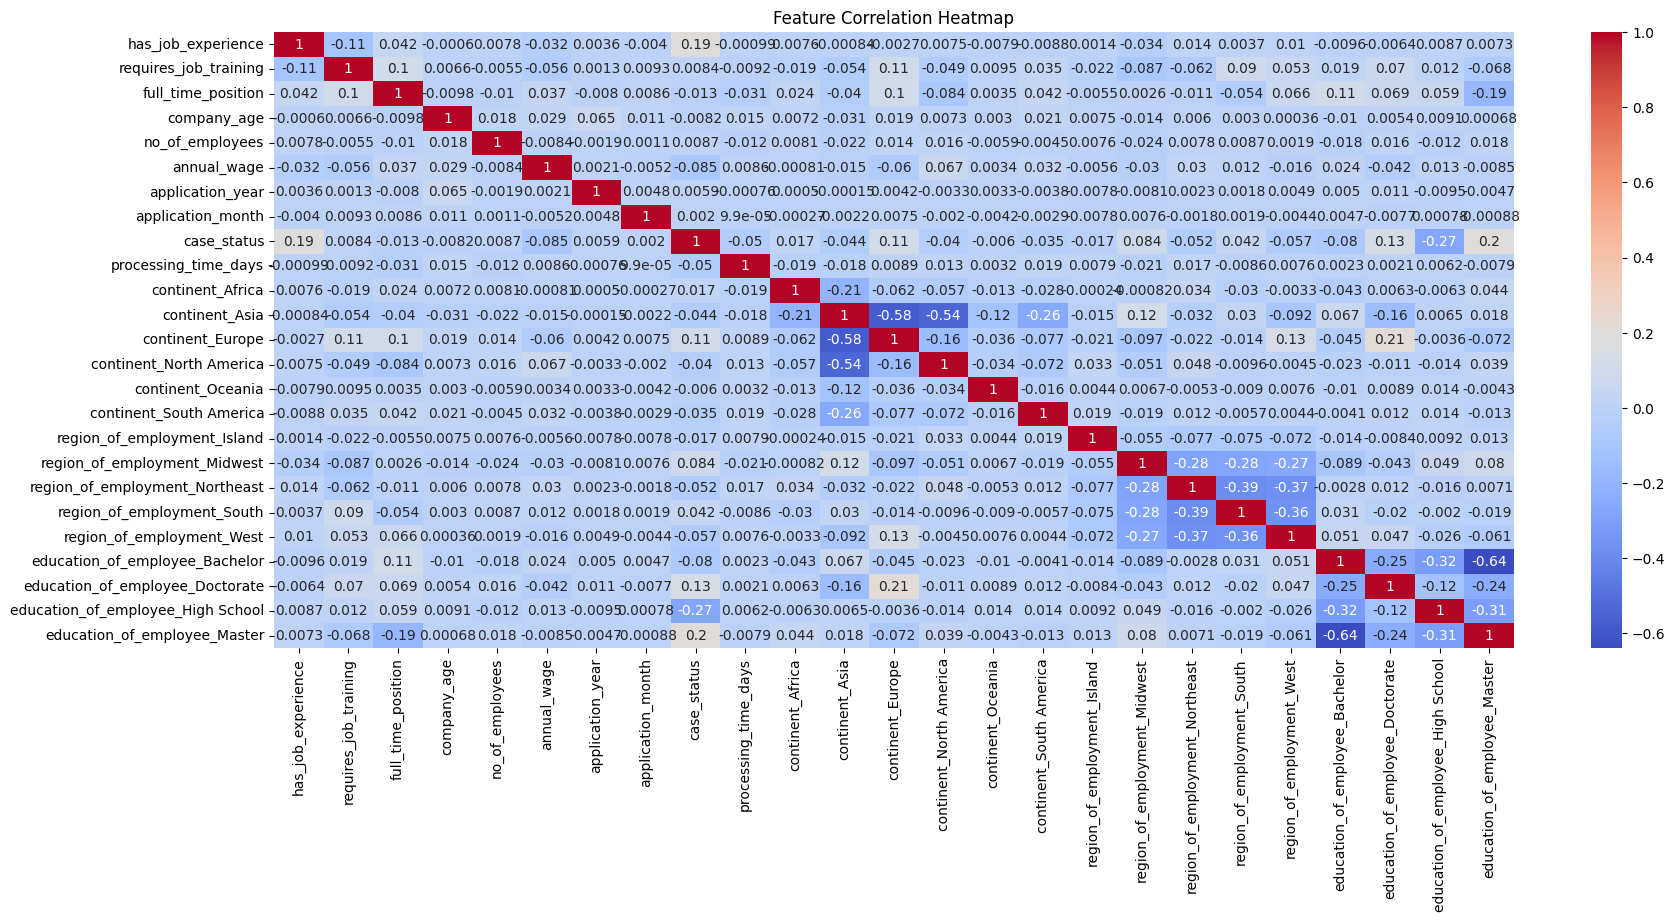

In [15]:
plt.figure(figsize=(20,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Feature Correlation Heatmap")
plt.show()

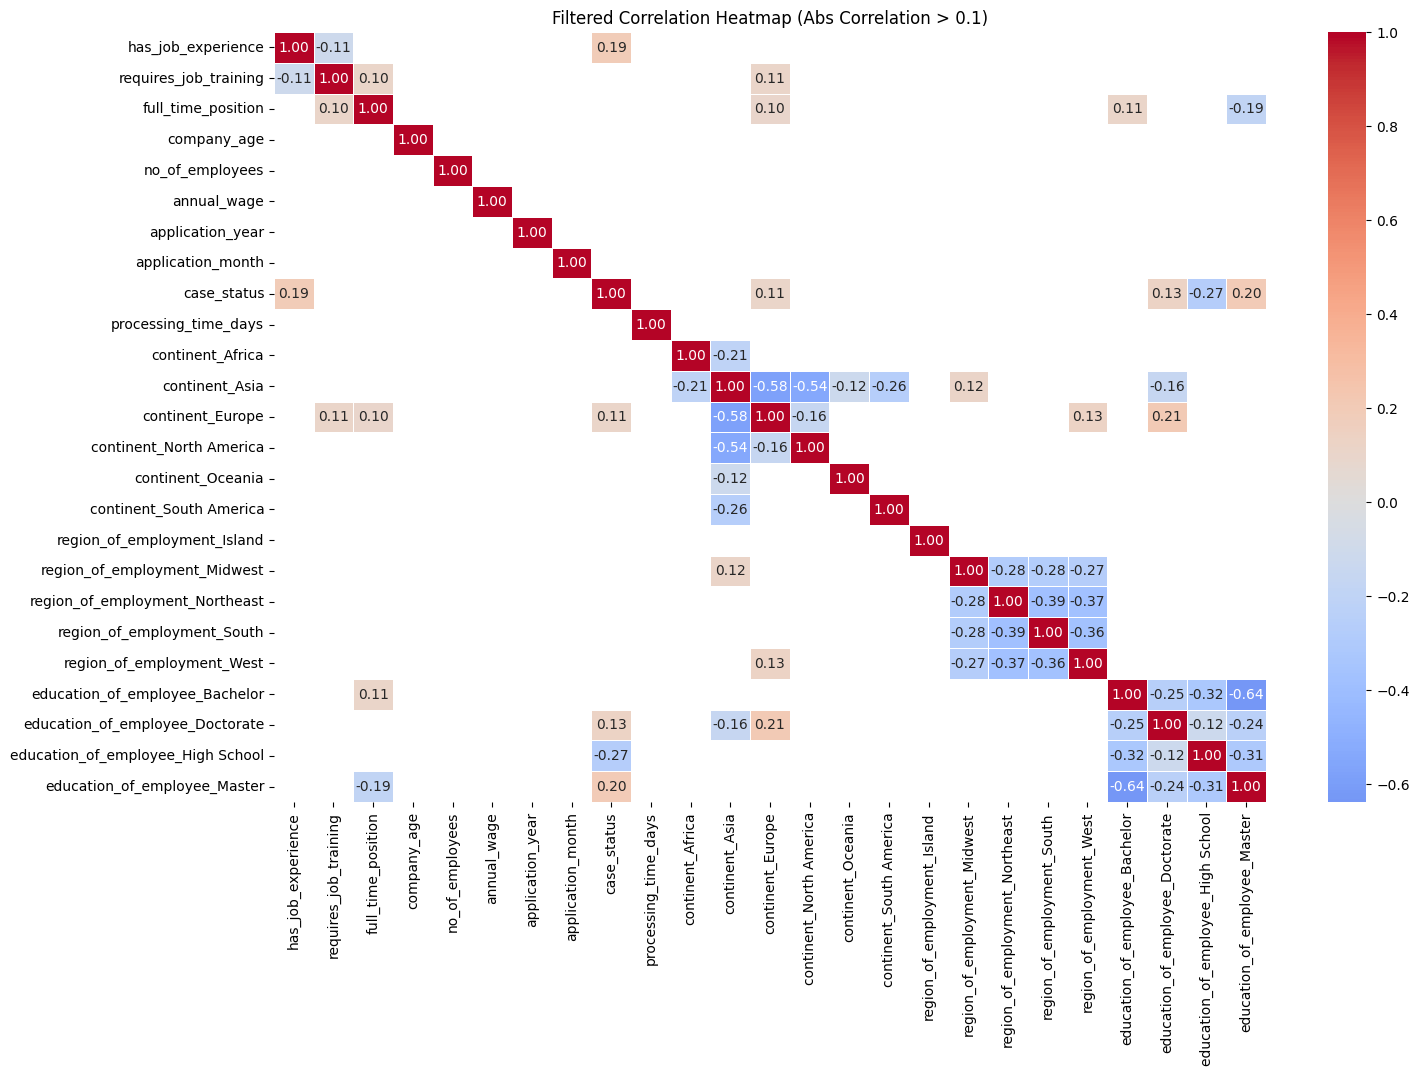

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

targets = ['case_status', 'processing_time_days']
threshold = 0.1

mask = (corr_matrix.abs() < threshold)

plt.figure(figsize=(16, 10))



sns.heatmap(corr_matrix,
            mask=mask,          
            annot=True,         
            fmt=".2f",           
            cmap='coolwarm',     
            center=0, 
            linewidths=.5)

plt.title(f'Filtered Correlation Heatmap (Abs Correlation > {threshold})')
plt.show()

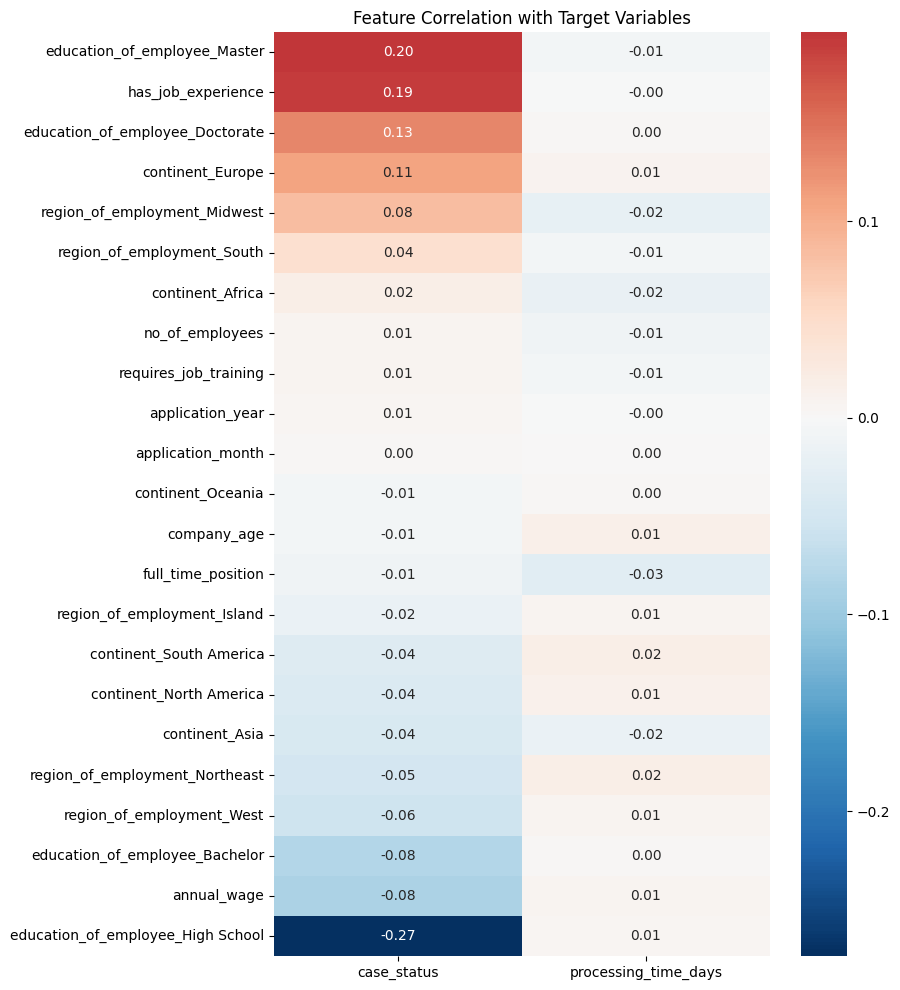

In [18]:
target_corr = corr_matrix[targets].drop(targets) 
target_corr = target_corr.sort_values(by='case_status', ascending=False)

plt.figure(figsize=(8, 12))
sns.heatmap(target_corr, 
            annot=True, 
            fmt=".2f", 
            cmap='RdBu_r', 
            center=0)

plt.title('Feature Correlation with Target Variables')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   full_time_position                 25480 non-null  int64  
 3   company_age                        25480 non-null  int64  
 4   no_of_employees                    25480 non-null  int64  
 5   annual_wage                        25480 non-null  float64
 6   application_year                   25480 non-null  int64  
 7   application_month                  25480 non-null  int64  
 8   decision_date                      25480 non-null  object 
 9   case_status                        25480 non-null  int64  
 10  processing_time_days               25480 non-null  int64  
 11  continent_Africa                   25480 non-null  int

FEATURE ENGINEERING

Created Wage Bands

In [21]:
bins = [0, 50000, 100000, 150000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']

df['wage_band'] = pd.cut(df['annual_wage'], bins=bins, labels=labels)

df = pd.get_dummies(df, columns=['wage_band'], prefix='wage')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   full_time_position                 25480 non-null  int64  
 3   company_age                        25480 non-null  int64  
 4   no_of_employees                    25480 non-null  int64  
 5   annual_wage                        25480 non-null  float64
 6   application_year                   25480 non-null  int64  
 7   application_month                  25480 non-null  int64  
 8   decision_date                      25480 non-null  object 
 9   case_status                        25480 non-null  int64  
 10  processing_time_days               25480 non-null  int64  
 11  continent_Africa                   25480 non-null  int

In [24]:
df.head()

,has_job_experience,requires_job_training,full_time_position,company_age,no_of_employees,annual_wage,application_year,application_month,decision_date,case_status,...,region_of_employment_South,region_of_employment_West,education_of_employee_Bachelor,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master,wage_Low,wage_Medium,wage_High,wage_Very High
0,0,0,1,10,14513,1231782.032,2017,8,2017-09-30,0,...,0,1,0,0,1,0,False,False,False,True
1,1,0,1,21,2412,83425.650,2023,7,2023-08-02,1,...,0,0,0,0,0,1,False,True,False,False
2,0,1,1,14,44444,122996.860,2022,1,2022-05-15,0,...,0,1,1,0,0,0,False,False,True,False
3,0,0,1,127,98,83434.030,2024,11,2025-02-27,0,...,0,1,1,0,0,0,False,True,False,False
4,1,0,1,16,1082,149907.390,2021,2,2021-04-20,1,...,1,0,0,0,0,1,False,False,True,False


company size (Small, Medium, Large, Enterprise)

In [25]:
bins = [0, 50, 250, 1000, float('inf')]
labels = ['Small', 'Medium', 'Large', 'Enterprise']

df['company_size'] = pd.cut(df['no_of_employees'], bins=bins, labels=labels)

df = pd.get_dummies(df, columns=['company_size'], prefix='company')


Generate Seasons

In [26]:
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df['season'] = df['application_month'].map(season_map)
df = pd.get_dummies(df, columns=['season'], prefix='season')


In [27]:
df.head()

,has_job_experience,requires_job_training,full_time_position,company_age,no_of_employees,annual_wage,application_year,application_month,decision_date,case_status,...,wage_High,wage_Very High,company_Small,company_Medium,company_Large,company_Enterprise,season_Fall,season_Spring,season_Summer,season_Winter
0,0,0,1,10,14513,1231782.032,2017,8,2017-09-30,0,...,False,True,False,False,False,True,False,False,True,False
1,1,0,1,21,2412,83425.650,2023,7,2023-08-02,1,...,False,False,False,False,False,True,False,False,True,False
2,0,1,1,14,44444,122996.860,2022,1,2022-05-15,0,...,True,False,False,False,False,True,False,False,False,True
3,0,0,1,127,98,83434.030,2024,11,2025-02-27,0,...,False,False,False,True,False,False,True,False,False,False
4,1,0,1,16,1082,149907.390,2021,2,2021-04-20,1,...,True,False,False,False,False,True,False,False,False,True


Region of High Processing

In [28]:
region_cols = [c for c in df.columns if c.startswith('region_of_employment_')]

df['region_name'] = df[region_cols].idxmax(axis=1).str.replace('region_of_employment_', '')

region_avg = df.groupby('region_name')['processing_time_days'].mean()
overall_avg = df['processing_time_days'].mean()

df['region_high_processing'] = df['region_name'].map(
    lambda r: int(region_avg[r] > overall_avg)
)

df.drop(columns=['region_name'], inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   full_time_position                 25480 non-null  int64  
 3   company_age                        25480 non-null  int64  
 4   no_of_employees                    25480 non-null  int64  
 5   annual_wage                        25480 non-null  float64
 6   application_year                   25480 non-null  int64  
 7   application_month                  25480 non-null  int64  
 8   decision_date                      25480 non-null  object 
 9   case_status                        25480 non-null  int64  
 10  processing_time_days               25480 non-null  int64  
 11  continent_Africa                   25480 non-null  int

In [33]:
df.head()

,has_job_experience,requires_job_training,full_time_position,company_age,no_of_employees,annual_wage,application_year,application_month,decision_date,case_status,...,wage_Very High,company_Small,company_Medium,company_Large,company_Enterprise,season_Fall,season_Spring,season_Summer,season_Winter,region_high_processing
0,0,0,1,10,14513,1231782.032,2017,8,2017-09-30,0,...,True,False,False,False,True,False,False,True,False,1
1,1,0,1,21,2412,83425.650,2023,7,2023-08-02,1,...,False,False,False,False,True,False,False,True,False,1
2,0,1,1,14,44444,122996.860,2022,1,2022-05-15,0,...,False,False,False,False,True,False,False,False,True,1
3,0,0,1,127,98,83434.030,2024,11,2025-02-27,0,...,False,False,True,False,False,True,False,False,False,1
4,1,0,1,16,1082,149907.390,2021,2,2021-04-20,1,...,False,False,False,False,True,False,False,False,True,0


Peak Season

In [34]:
df['is_peak_season'] = df['application_month'].isin([3,4,5]).astype(int)


In [36]:
df['is_peak_season'].value_counts()


is_peak_season
0    19094
1     6386
Name: count, dtype: int64

In [35]:
df.head()

,has_job_experience,requires_job_training,full_time_position,company_age,no_of_employees,annual_wage,application_year,application_month,decision_date,case_status,...,company_Small,company_Medium,company_Large,company_Enterprise,season_Fall,season_Spring,season_Summer,season_Winter,region_high_processing,is_peak_season
0,0,0,1,10,14513,1231782.032,2017,8,2017-09-30,0,...,False,False,False,True,False,False,True,False,1,0
1,1,0,1,21,2412,83425.650,2023,7,2023-08-02,1,...,False,False,False,True,False,False,True,False,1,0
2,0,1,1,14,44444,122996.860,2022,1,2022-05-15,0,...,False,False,False,True,False,False,False,True,1,0
3,0,0,1,127,98,83434.030,2024,11,2025-02-27,0,...,False,True,False,False,True,False,False,False,1,0
4,1,0,1,16,1082,149907.390,2021,2,2021-04-20,1,...,False,False,False,True,False,False,False,True,0,0


Columns With More Than 2 Distinct Numeric Values

In [37]:
binary_check = df.select_dtypes(include=['int64','float64']).nunique()
print(binary_check[binary_check > 2])

company_age               223
no_of_employees          7105
annual_wage             25456
application_year            9
application_month          12
processing_time_days      155
dtype: int64


In [38]:
binary_cols = [c for c in df.columns if df[c].nunique() == 2]
print(binary_cols)


['has_job_experience', 'requires_job_training', 'full_time_position', 'case_status', 'continent_Africa', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'region_of_employment_Island', 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_South', 'region_of_employment_West', 'education_of_employee_Bachelor', 'education_of_employee_Doctorate', 'education_of_employee_High School', 'education_of_employee_Master', 'wage_Low', 'wage_Medium', 'wage_High', 'wage_Very High', 'company_Small', 'company_Medium', 'company_Large', 'company_Enterprise', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'region_high_processing', 'is_peak_season']


In [39]:
df.drop(columns=['decision_date'], inplace=True)

In [40]:
df.to_csv("Feature_engineered_data.csv", index=False)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   full_time_position                 25480 non-null  int64  
 3   company_age                        25480 non-null  int64  
 4   no_of_employees                    25480 non-null  int64  
 5   annual_wage                        25480 non-null  float64
 6   application_year                   25480 non-null  int64  
 7   application_month                  25480 non-null  int64  
 8   case_status                        25480 non-null  int64  
 9   processing_time_days               25480 non-null  int64  
 10  continent_Africa                   25480 non-null  int64  
 11  continent_Asia                     25480 non-null  int

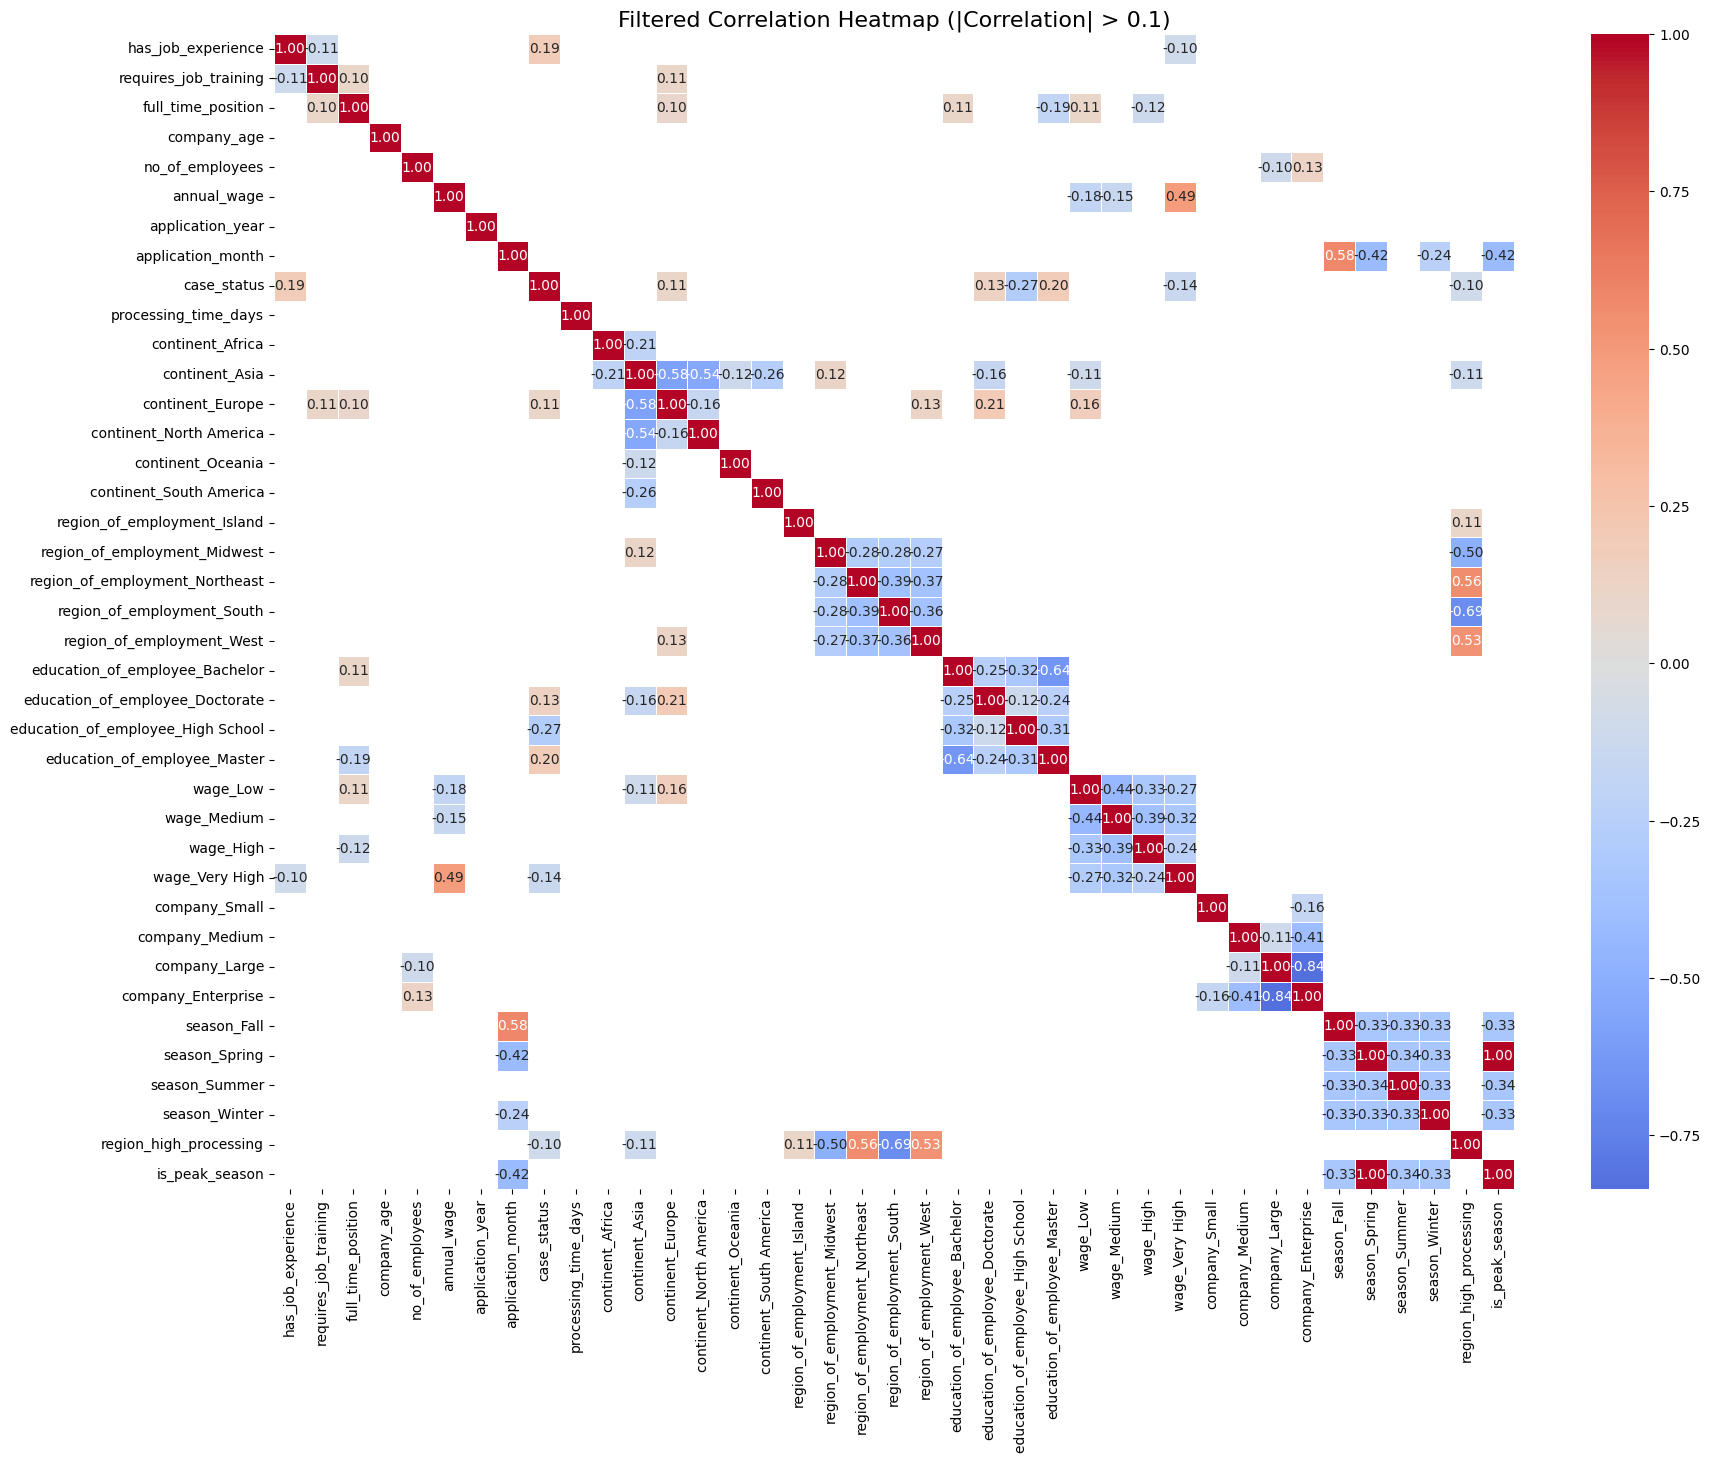

In [43]:
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'bool'])

numeric_df = numeric_df.astype(int)

corr_matrix = numeric_df.corr()

threshold = 0.1
mask = corr_matrix.abs() < threshold

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    mask=mask,  
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title(f'Filtered Correlation Heatmap (|Correlation| > {threshold})', fontsize=16)
plt.show()


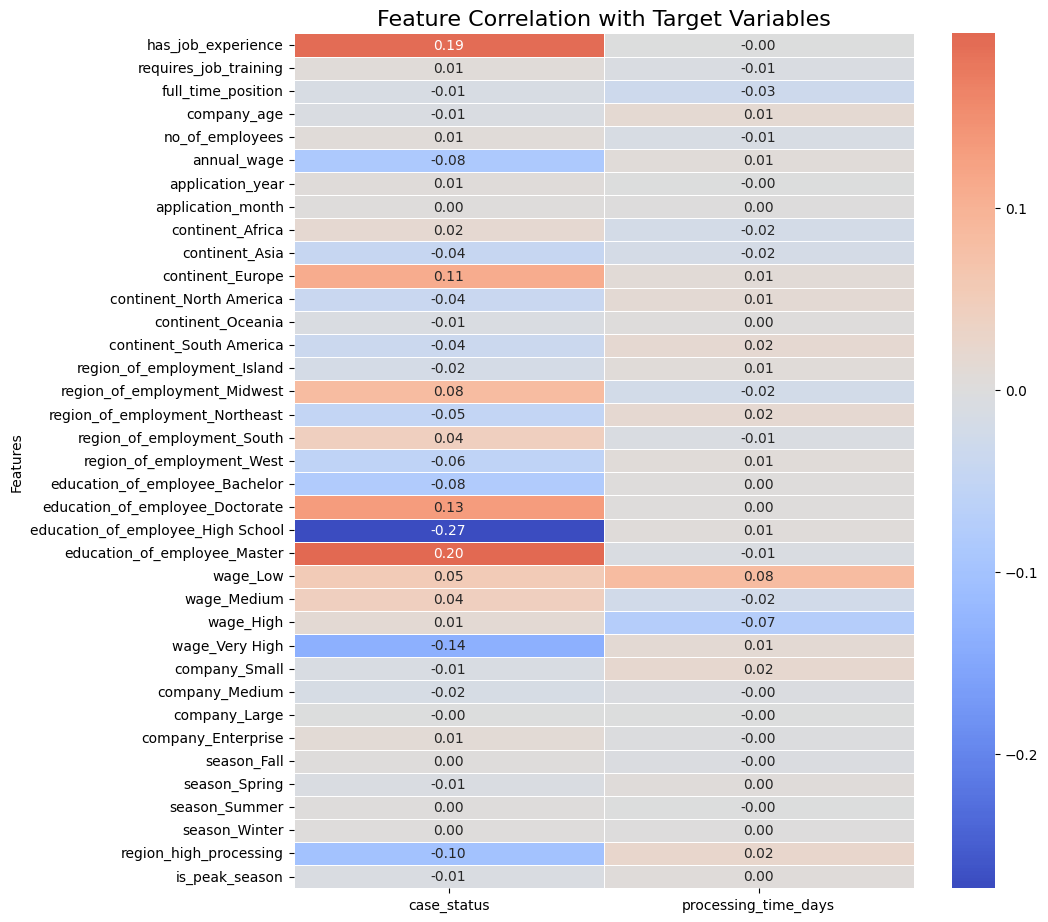

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'bool'])

numeric_df = numeric_df.astype(int)

corr_matrix = numeric_df.corr()

target_vars = ['case_status', 'processing_time_days']
feature_corr = corr_matrix[target_vars].drop(target_vars)  
plt.figure(figsize=(10, max(5, len(feature_corr) * 0.3)))  
sns.heatmap(
    feature_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title("Feature Correlation with Target Variables", fontsize=16)
plt.ylabel("Features")
plt.show()


In [6]:
df = pd.read_csv(r"C:\Users\sachin\visa\visa-status-prediction-1\datasets\Feature_engineered_data.csv")

In [7]:
wage_cols = [
    'wage_Low',
    'wage_Medium',
    'wage_High',
    'wage_Very High'
]

df['wage_band'] = df[wage_cols].idxmax(axis=1).str.replace('wage_', '')


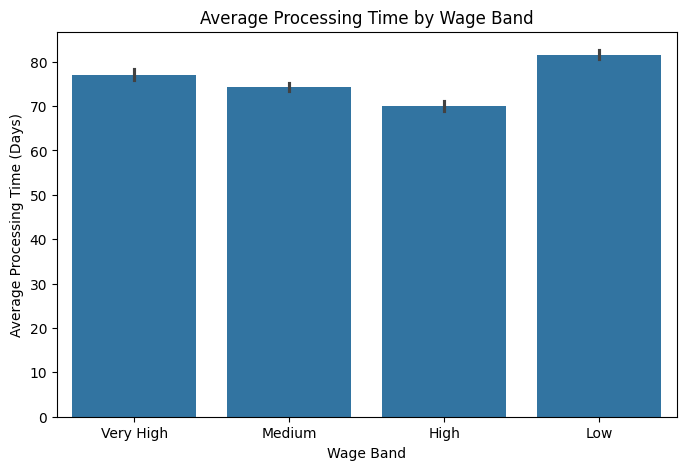

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='wage_band',
    y='processing_time_days',
    estimator='mean'
)

plt.title("Average Processing Time by Wage Band")
plt.xlabel("Wage Band")
plt.ylabel("Average Processing Time (Days)")
plt.show()

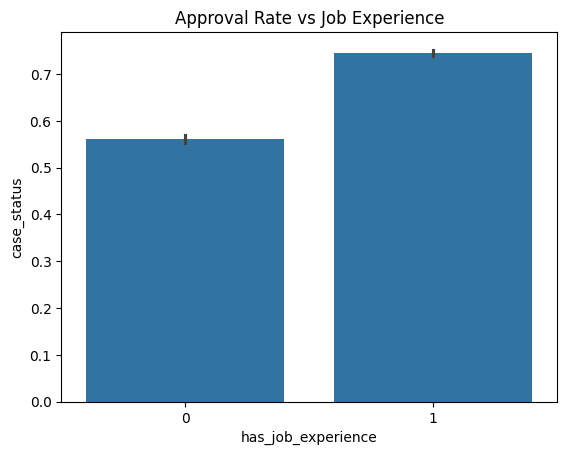

In [11]:
sns.barplot(
    data=df,
    x='has_job_experience',
    y='case_status'
)
plt.title("Approval Rate vs Job Experience")
plt.show()


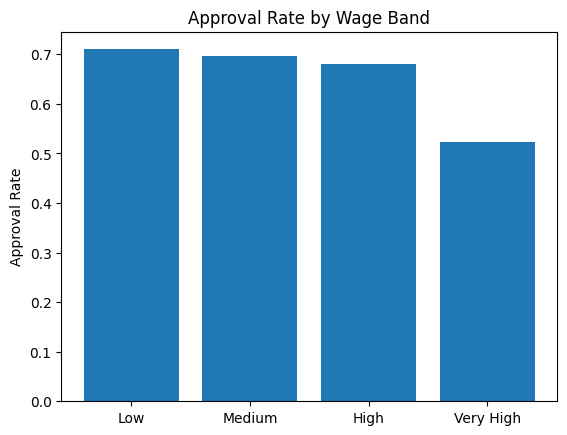

In [13]:
wage_cols = ['wage_Low','wage_Medium','wage_High','wage_Very High']

wage_approval = {
    col.replace('wage_', ''):
    df[df[col]==1]['case_status'].mean()
    for col in wage_cols
}

plt.bar(wage_approval.keys(), wage_approval.values())
plt.ylabel("Approval Rate")
plt.title("Approval Rate by Wage Band")
plt.show()


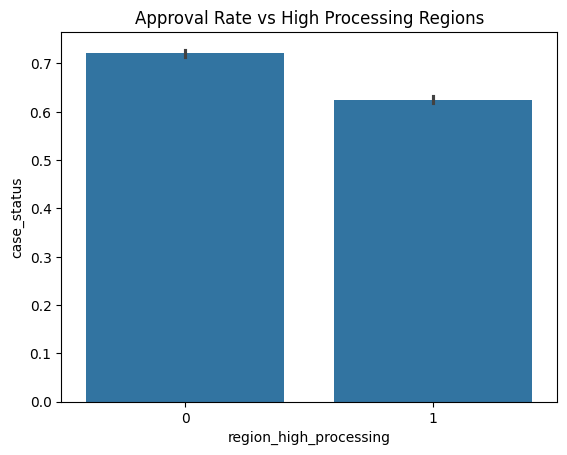

In [14]:
sns.barplot(
    data=df,
    x='region_high_processing',
    y='case_status'
)
plt.title("Approval Rate vs High Processing Regions")
plt.show()


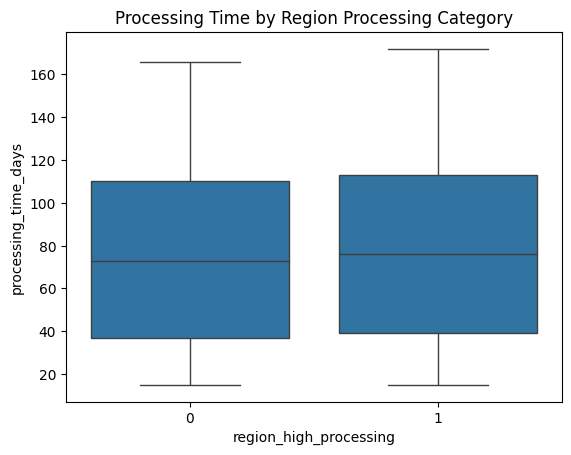

In [15]:
sns.boxplot(
    data=df,
    x='region_high_processing',
    y='processing_time_days'
)
plt.title("Processing Time by Region Processing Category")
plt.show()
